In [90]:
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36",
    "cookie": '_vwo_uuid_v2=DB340FF8CF3EA6738F814A754051BCA28|659a0d0d70163e13d90eca80c2569d24; _vwo_uuid=DB340FF8CF3EA6738F814A754051BCA28; _vis_opt_s=1%7C; _vis_opt_test_cookie=1; ELOQUA=GUID=F31A7031BC7E40558FBBD8D2BECD5811; _biz_uid=d7de049813ee4fe9856ab26a4017fd14; _biz_nA=1; _rdt_uuid=1759136839072.f3a8f397-401e-495a-b659-a26fff1ee8d4; _uetvid=b31a65d09d1311f0877b258e77af8827|gjmiij|1759136839138|1|1|bat.bing.com/p/insights/c/b; _biz_pendingA=%5B%5D; OptanonAlertBoxClosed=2025-09-29T09:07:20.118Z; _gcl_au=1.1.505329219.1759136840; _clck=ry8smr%5E2%5Efzq%5E1%5E2098; _vwo_consent=1%2C1%3A~; OptanonConsent=isGpcEnabled=0&datestamp=Mon+Sep+29+2025+17%3A07%3A20+GMT%2B0800+(%E4%B8%AD%E5%9B%BD%E6%A0%87%E5%87%86%E6%97%B6%E9%97%B4)&version=202503.2.0&browserGpcFlag=0&isIABGlobal=false&hosts=&consentId=b20176cb-22cc-4195-9f54-723fce424470&interactionCount=1&isAnonUser=1&landingPath=NotLandingPage&groups=C0001%3A1%2CC0003%3A1%2CC0004%3A1%2CC0002%3A1&intType=1; _zitok=12e19f0fff7412781c9c1759136840; _vwo_ds=3%3At_0%2Ca_0%3A0%241759136835%3A23.49578441%3A%3A%3A%3A3; _biz_flagsA=%7B%22Version%22%3A1%2C%22XDomain%22%3A%221%22%2C%22ViewThrough%22%3A%221%22%7D; _ga_9R70GJ8HZF=GS2.1.s1759136838$o1$g1$t1759136852$j46$l0$h124298599; _ga_K6K0YXL6HJ=GS2.1.s1759136838$o1$g1$t1759136852$j46$l0$h1945443282; _ga_V1YLG54MGT=GS2.1.s1759136838$o1$g1$t1759136852$j46$l0$h653850004; esi.isLocalStorageCleared=true; _ga=GA1.2.1939869012.1759136840; esi.Show=; esi.Type=; esi.FilterValue=; esi.GroupBy=; esi.FilterBy=; esi.authorsList=; esi.frontList=; esi.fieldsList=; esi.instList=; esi.journalList=; esi.terriList=; esi.titleList=; PSSID="H3-pPe8CrsmiWpVreLXrmL125yMLx2BETbgOX-18x2d7HzkvFFndcDsoix2BefrHXeAx3Dx3DNRmfcY8DL0xxNd8Dap3cREwx3Dx3D-UbBOHnbcoZFT7HXN4BWHuAx3Dx3D-g8gwe2x2FCACrXir3kl3BKkwx3Dx3D"; IC2_SID="H3-pPe8CrsmiWpVreLXrmL125yMLx2BETbgOX-18x2d7HzkvFFndcDsoix2BefrHXeAx3Dx3DNRmfcY8DL0xxNd8Dap3cREwx3Dx3D-UbBOHnbcoZFT7HXN4BWHuAx3Dx3D-g8gwe2x2FCACrXir3kl3BKkwx3Dx3D"; CUSTOMER_NAME="EAST CHINA NORMAL UNIV"; E_GROUP_NAME="IC2 Platform"; SUBSCRIPTION_GROUP_ID="260055"; SUBSCRIPTION_GROUP_NAME="EAST CHINA NORMAL UNIV_20151126590_1"; CUSTOMER_GROUP_ID="99582"; IP_SET_ID_NAME="E China Normal U"; IP_SET_ID="3204746"; ROAMING_DISABLED="true"; ACCESS_METHOD="IP"; userAuthType="TrustedIPAuth"; userAuthIDType="222.66.117.91"; _gid=GA1.2.586909952.1759318580; _sp_ses.2f26=*; _sp_id.2f26=bd49e242-f937-4c79-bdb3-2dc71e84f395.1759136884.4.1759326340.1759323478.806dcfa0-36fc-4168-bef9-e354ed455e35; _ga_D5KRF08D0Q=GS2.2.s1759326343$o4$g0$t1759326343$j60$l0$h0; JSESSIONID=6809EAEC1D68A231539E2A3A10AAAB1B; __cf_bm=QYbGus3IKqDywpGtGMIYrK3HuRCkIoMXEjeJYqiMAqI-1759326454-1.0.1.1-jJFETADwmp0D_KHJfN9IRvWfGzErfORaSzAb1Y8gXCk3RSX8cHm_JsLs4fDQ0pgRMZTKYhO4T.DAxudLIXD.mNcu9S.JJJmWNiafHYC3lz8',
}


In [94]:
import requests
import os
from bs4 import BeautifulSoup

URL = "https://esi.clarivate.com/IndicatorsAction.action"
s = requests.Session()

res = s.get(URL, headers=headers)
html = res.text
soup = BeautifulSoup(html, "lxml")
text = soup.find_all("div", class_="checkbox-2columns filter-values")

sum = 0

def download_pdf(url, file_name, download_path):
    global sum
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        sum += 1
        file_name = file_name + ".csv"
        file_name = file_name.replace("%26", "&")
        file_name = file_name.replace("/", " ")
        with open(download_path + file_name, "wb") as file:
            file.write(response.content)
        print("完成对" + file_name + "的下载")
    else:
        print("未能将" + file_name + "成功下载")


categories_name = ""
download_path = "./download/"

os.makedirs(download_path, exist_ok=True)
for next_text in text:
    lines = next_text.text.splitlines()
    lines.pop(0)
    print(lines)
    for name in lines[8:]:
        categories_name = name.replace("&", "%26")
        categories_name = categories_name.upper()
        s1 = "&show=Top&sort=%5B%7B%22property%22:%22cites%22,%22direction%22:%22DESC%22%7D%5D&colFilterVal=&exportType=indicators&colNames=RowSeq,,Institutions,Countries/Regions,Web%20of%20Science%20Documents,Cites,Cites/Paper,Top%20Papers&fileType=CSV&f=IndicatorsExport.csv"
        file_url = (
            "https://esi.clarivate.com/IndicatorsExport.action?exportFile&_dc=1368621151464&groupBy=Institutions&start=0&limit=1381&filterBy=ResearchFields&filterValue="
            + categories_name
            + s1
        )
        download_pdf(file_url, categories_name, download_path)
print("成功下载了" + str(sum) + "个文件")

['Agricultural Sciences', 'Biology & Biochemistry', 'Chemistry', 'Clinical Medicine', 'Computer Science', 'Economics & Business', 'Engineering', 'Environment/Ecology', 'Geosciences', 'Immunology', 'Materials Science', 'Mathematics', 'Microbiology', 'Molecular Biology & Genetics', 'Multidisciplinary', 'Neuroscience & Behavior', 'Pharmacology & Toxicology', 'Physics', 'Plant & Animal Science', 'Psychiatry/Psychology', 'Social Sciences, General', 'Space Science']
完成对GEOSCIENCES.csv的下载
完成对IMMUNOLOGY.csv的下载
完成对MATERIALS SCIENCE.csv的下载
完成对MATHEMATICS.csv的下载
完成对MICROBIOLOGY.csv的下载
完成对MOLECULAR BIOLOGY & GENETICS.csv的下载
完成对MULTIDISCIPLINARY.csv的下载
完成对NEUROSCIENCE & BEHAVIOR.csv的下载
完成对PHARMACOLOGY & TOXICOLOGY.csv的下载
完成对PHYSICS.csv的下载
完成对PLANT & ANIMAL SCIENCE.csv的下载
完成对PSYCHIATRY PSYCHOLOGY.csv的下载
完成对SOCIAL SCIENCES, GENERAL.csv的下载
完成对SPACE SCIENCE.csv的下载
成功下载了14个文件


In [95]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="paper")
plt.rcParams['font.sans-serif'] = ['Source Han Sans SC'] 
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题


In [101]:
# --- 1. 数据加载与清洗  ---
print("--- 步骤 1: 正在加载与清洗数据... ---")

data_folder = './download/'
all_data_frames = []
for filename in os.listdir(data_folder):
    if filename.endswith(".csv"):
        subject_name = os.path.splitext(filename)[0].upper()
        file_path = os.path.join(data_folder, filename)
        try:
            df = pd.read_csv(file_path, skiprows=1, encoding='latin-1')
            df['Subject'] = subject_name
            all_data_frames.append(df)
        except Exception as e:
            print(f"处理文件 {filename} 时出错: {e}")

master_df = pd.concat(all_data_frames, ignore_index=True)
master_df.rename(columns={'Unnamed: 0': 'Rank', 'Web of Science Documents': 'Documents', 'Cites/Paper': 'Cites_Per_Paper', 'Countries/Regions': 'Country'}, inplace=True)
numeric_cols = ['Rank', 'Documents', 'Cites', 'Cites_Per_Paper', 'Top Papers']
for col in numeric_cols:
    master_df[col] = pd.to_numeric(master_df[col], errors='coerce')
master_df.dropna(inplace=True)
int_cols = ['Rank', 'Documents', 'Cites', 'Top Papers']
master_df[int_cols] = master_df[int_cols].astype(int)
print("数据清洗完成！总共加载有效数据行数:", len(master_df))

--- 步骤 1: 正在加载与清洗数据... ---
数据清洗完成！总共加载有效数据行数: 30960



--- 步骤 2: 正在进行宏观分析... ---


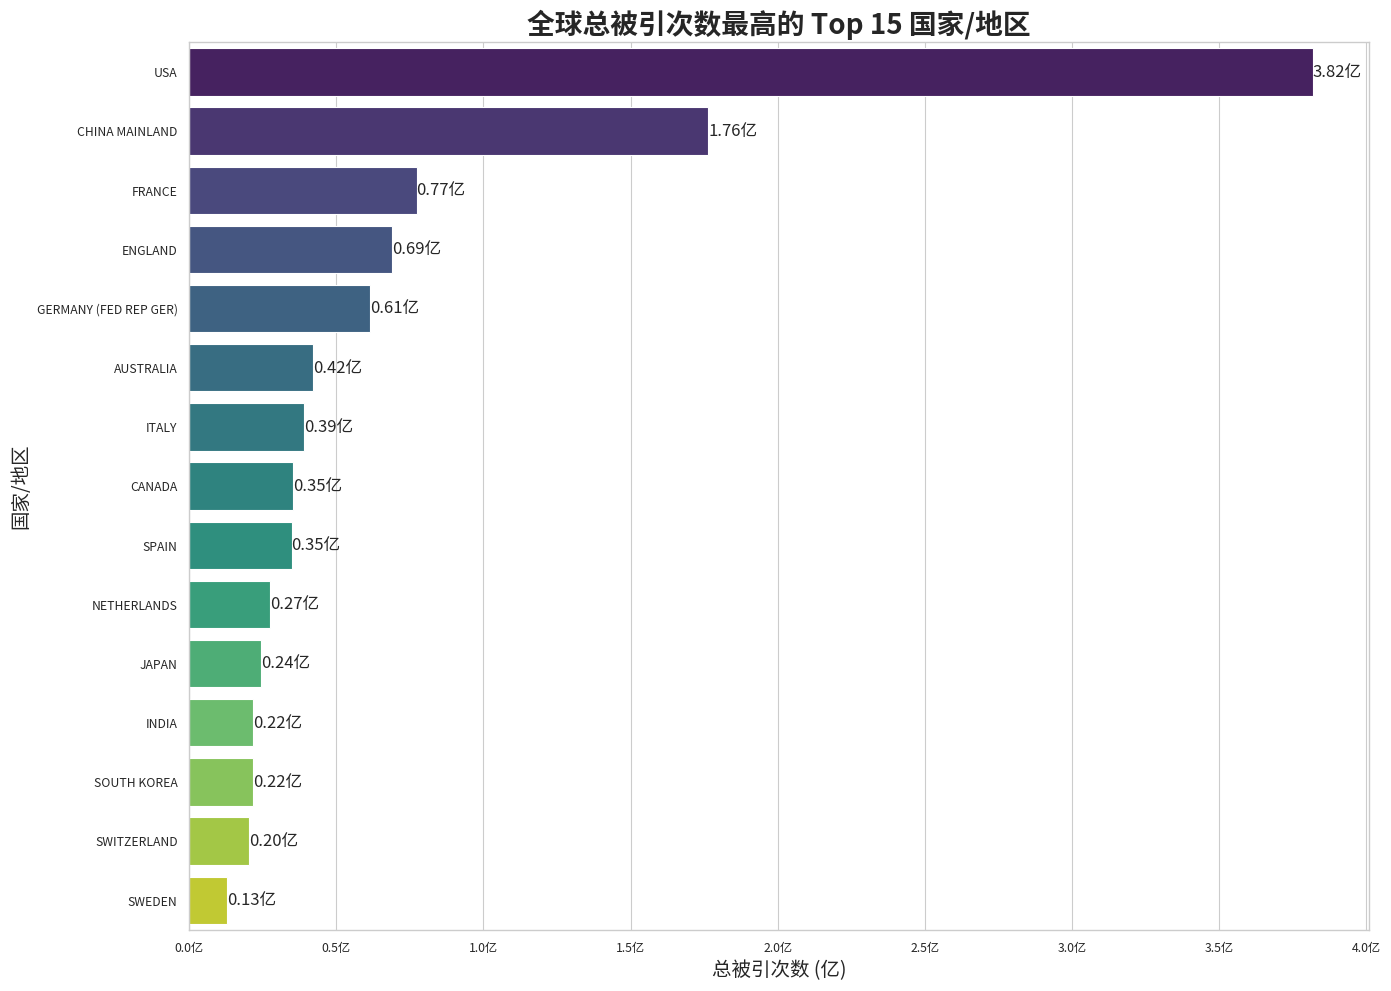

In [97]:
# --- 2. 宏观分析与精美可视化 ---
print("\n--- 步骤 2: 正在进行宏观分析... ---")

# 2.1 按国家/地区分析
country_analysis = master_df.groupby('Country')['Cites'].sum().sort_values(ascending=False).head(15)

# 使用面向对象接口创建图表
fig, ax = plt.subplots(figsize=(14, 10))
barplot = sns.barplot(x=country_analysis.values, y=country_analysis.index, palette='viridis', ax=ax, hue=country_analysis.index, legend=False)

ax.set_title('全球总被引次数最高的 Top 15 国家/地区', fontsize=20, weight='bold')
ax.set_xlabel('总被引次数 (亿)', fontsize=14)
ax.set_ylabel('国家/地区', fontsize=14)
# 格式化X轴标签，将数字转换为以“亿”为单位
ax.xaxis.set_major_formatter(lambda x, pos: f'{x/1e8:.1f}亿')

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2,
            f'{width/1e8:.2f}亿',
            va='center', ha='left', fontsize=12)

plt.tight_layout()
plt.show()


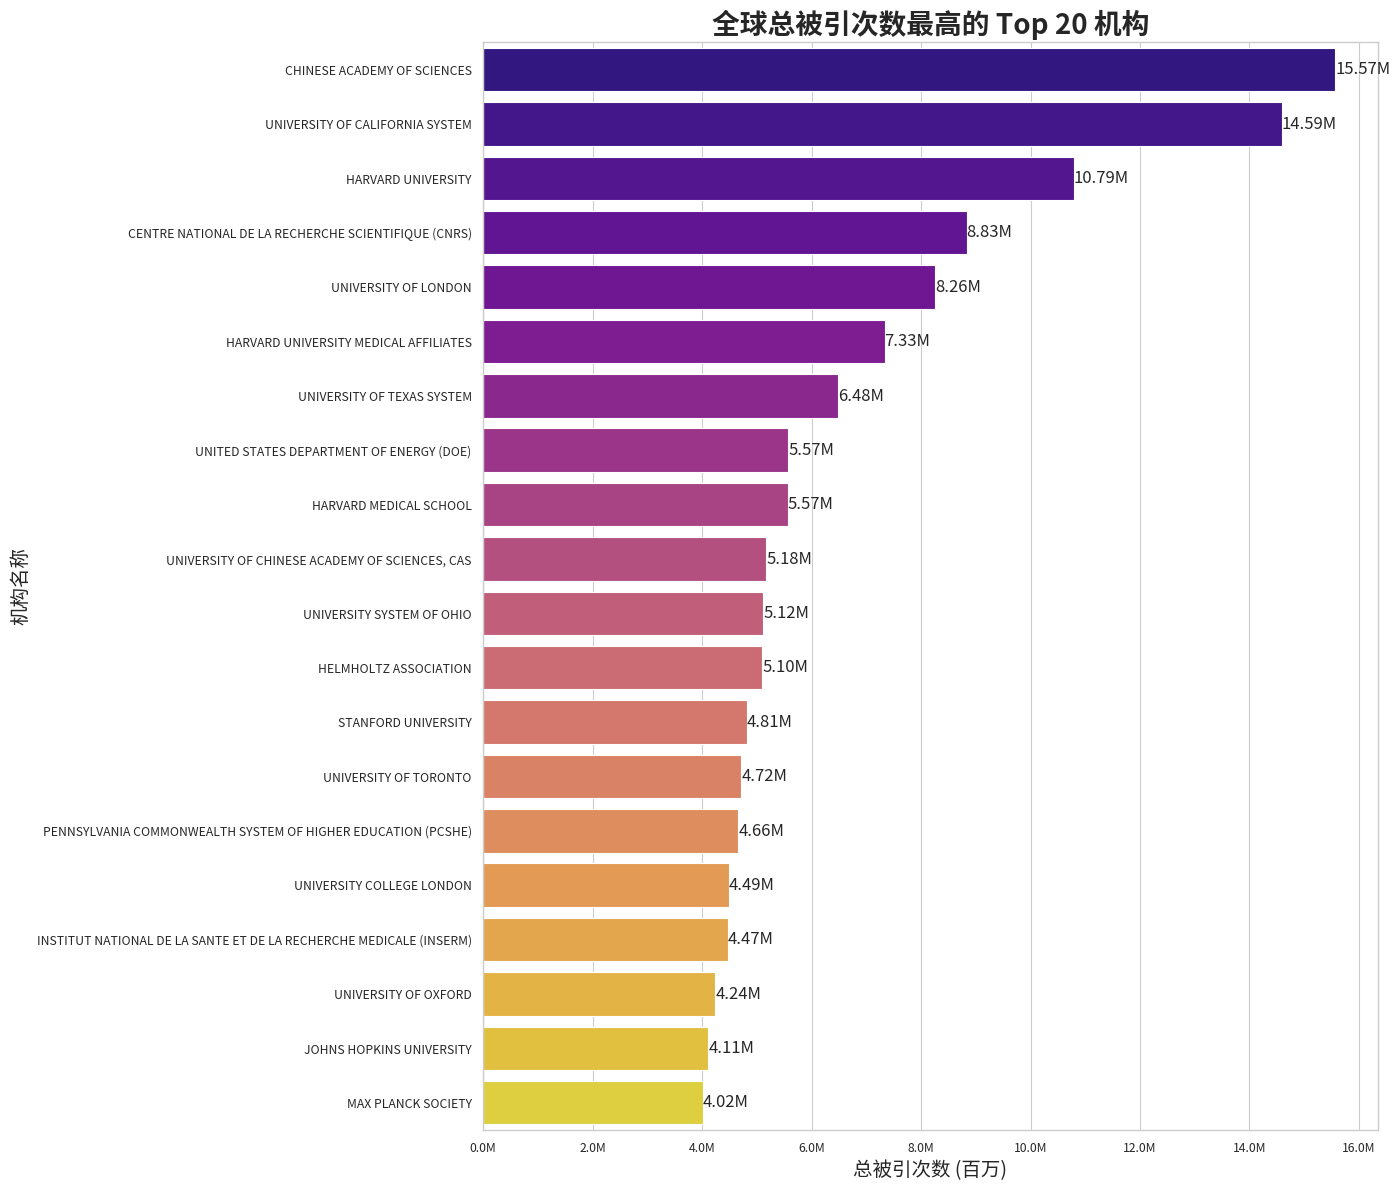

In [98]:
# --- 2.2 按机构分析 ---
institution_analysis = master_df.groupby('Institutions')['Cites'].sum().sort_values(ascending=False).head(20)

# 使用面向对象接口创建图表
fig, ax = plt.subplots(figsize=(14, 12)) # 增加了图表高度以容纳20个机构名称
barplot = sns.barplot(x=institution_analysis.values, y=institution_analysis.index, palette='plasma', ax=ax, hue=institution_analysis.index, legend=False)


ax.set_title('全球总被引次数最高的 Top 20 机构', fontsize=20, weight='bold')
ax.set_xlabel('总被引次数 (百万)', fontsize=14)
ax.set_ylabel('机构名称', fontsize=14)
# 格式化X轴标签，将数字转换为以“百万”为单位
ax.xaxis.set_major_formatter(lambda x, pos: f'{x/1e6:.1f}M')

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    # 在柱子末端稍微靠右的位置添加文本
    ax.text(width, p.get_y() + p.get_height() / 2, 
            f'{width/1e6:.2f}M', # M 代表百万 (Million)
            va='center', ha='left', fontsize=12)

plt.tight_layout()
plt.show()


--- 步骤 3: 正在分析 East China Normal University... ---


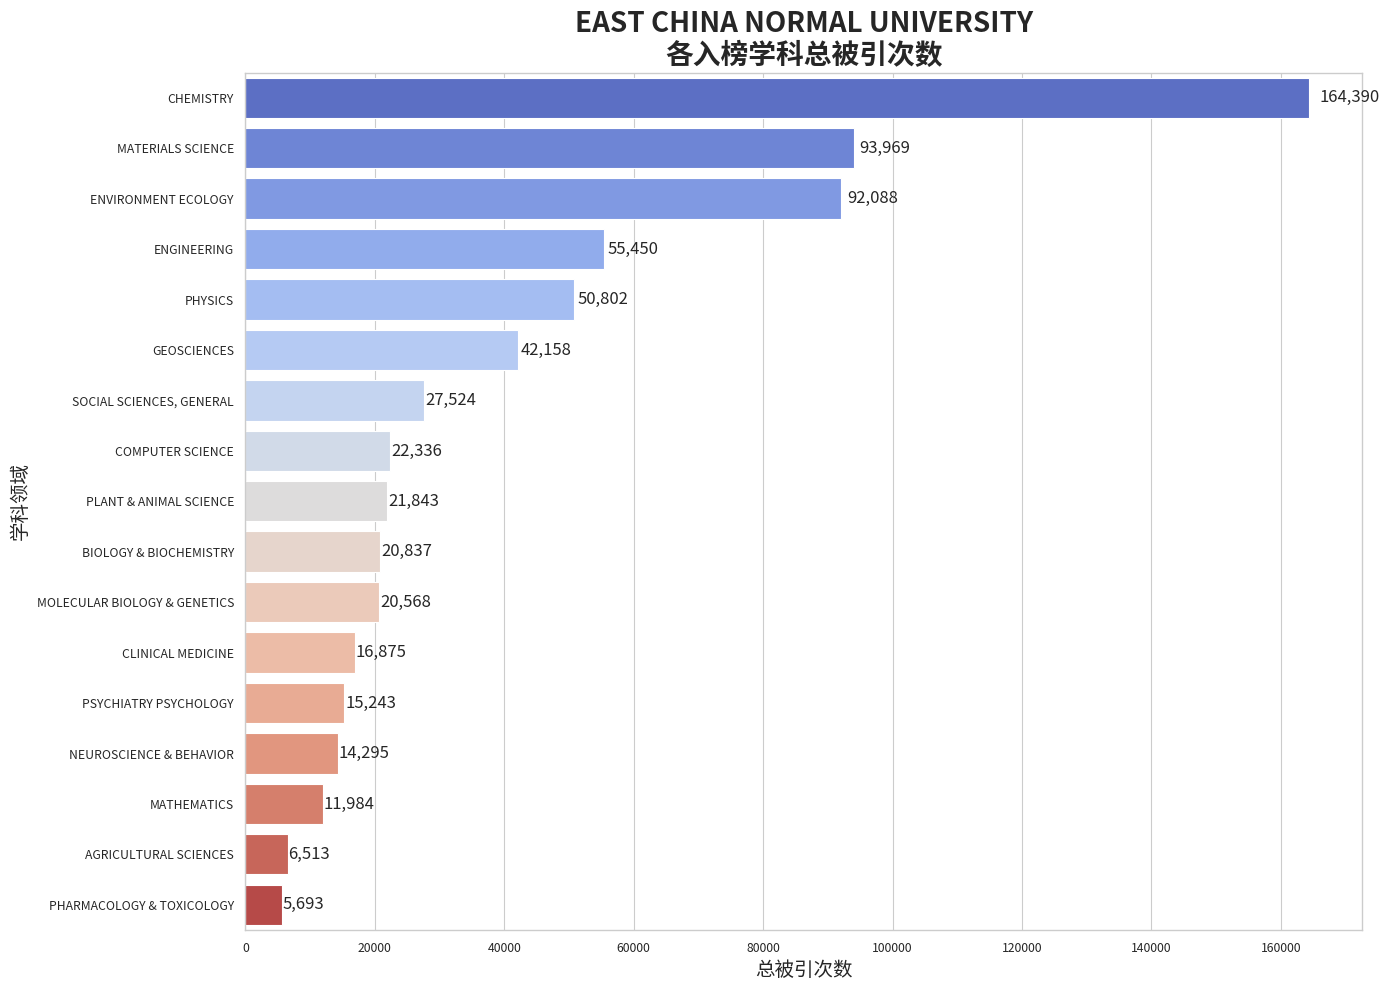

In [123]:
# --- 3. ECNU 深度分析与精美可视化 ---
print("\n--- 步骤 3: 正在分析 East China Normal University... ---")
university_name = "EAST CHINA NORMAL UNIVERSITY"
# university_name = "BEIJING INSTITUTE OF TECHNOLOGY"
# university_name = "PEKING UNIVERSITY"
# university_name = "TSINGHUA UNIVERSITY"
# university_name = "SHANGHAI UNIVERSITY"
# university_name = "UNIVERSITY OF TOKYO"

ecnu_data = master_df[master_df['Institutions'] == university_name]

if not ecnu_data.empty:
    ecnu_sorted_by_cites = ecnu_data.sort_values(by='Cites', ascending=False)
    
    fig, ax = plt.subplots(figsize=(14, 10))
    sns.barplot(x='Cites', y='Subject', data=ecnu_sorted_by_cites, palette='coolwarm', ax=ax, hue='Subject', legend=False)
    ax.set_title(f'{university_name}\n各入榜学科总被引次数', fontsize=20, weight='bold')
    ax.set_xlabel('总被引次数', fontsize=14)
    ax.set_ylabel('学科领域', fontsize=14)
    
    # 添加数据标签
    for p in ax.patches:
        width = p.get_width()
        ax.text(width * 1.01, p.get_y() + p.get_height() / 2,
                f'{int(width):,}', # 格式化为千位分隔符
                va='center', fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print(f"未在数据中找到 {university_name}。")



--- 步骤 4: 正在进行四校对比分析... ---


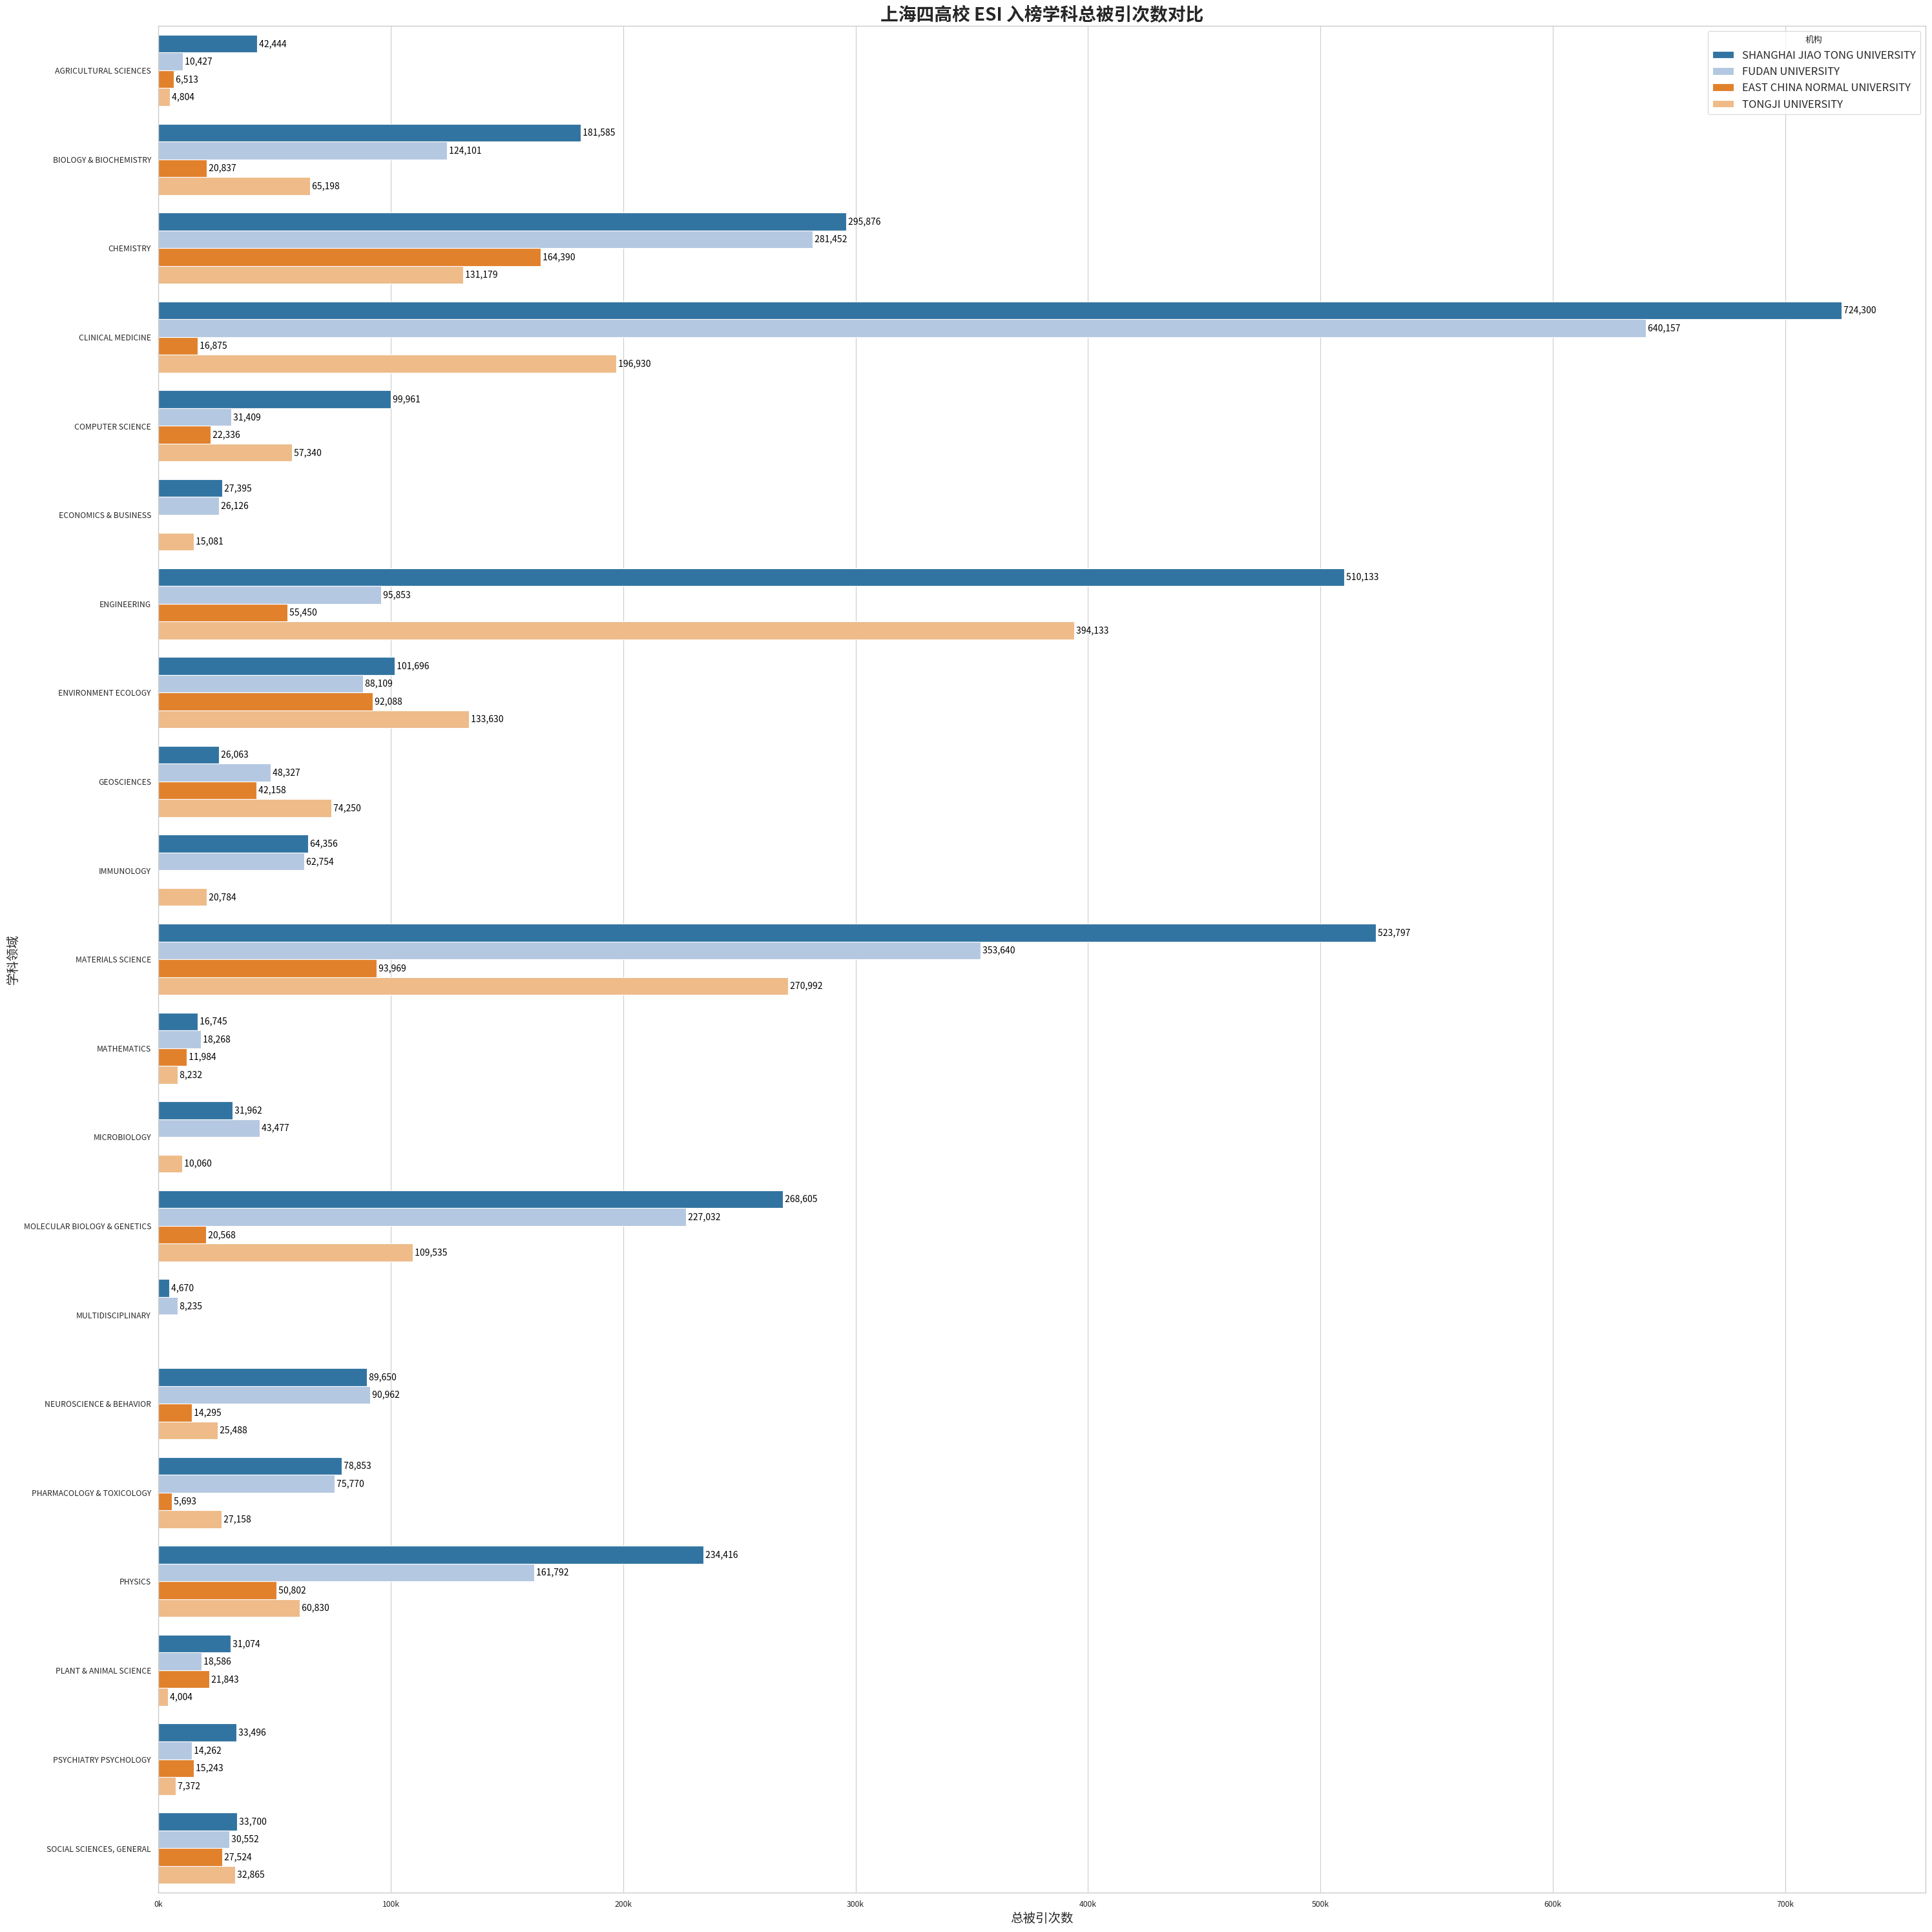

In [122]:
# --- 4. 四校对比分析 (ECNU, Fudan, Tongji, SJTU) ---
print("\n--- 步骤 4: 正在进行四校对比分析... ---")

# 定义要比较的四所高校的名称（必须与CSV中的完全一致）
comparison_list = [
    # "PEKING UNIVERSITY",
    # "TSINGHUA UNIVERSITY",
    "EAST CHINA NORMAL UNIVERSITY",
    "FUDAN UNIVERSITY",
    "TONGJI UNIVERSITY",
    "SHANGHAI JIAO TONG UNIVERSITY"
    # "BEIJING INSTITUTE OF TECHNOLOGY",
    # "SHANGHAI UNIVERSITY",
    # "UNIVERSITY OF TOKYO"
]

# 筛选出这四所高校的所有数据
comparison_df = master_df[master_df['Institutions'].isin(comparison_list)]

# 按学科和总引用数排序，以获得更好的可视化效果
comparison_df_sorted = comparison_df.sort_values(by=['Subject', 'Cites'], ascending=[True, False])

if not comparison_df.empty:
    # 增加图表高度以容纳更多学科
    fig, ax = plt.subplots(figsize=(30, 30)) 
    
    sns.barplot(x='Cites', y='Subject', hue='Institutions', data=comparison_df_sorted, palette='tab20', ax=ax)
    
    ax.set_title('上海四高校 ESI 入榜学科总被引次数对比', fontsize=20, weight='bold')
    ax.set_xlabel('总被引次数', fontsize=14)
    ax.set_ylabel('学科领域', fontsize=14)
    ax.legend(title='机构', fontsize=12)
    ax.xaxis.set_major_formatter(lambda x, pos: f'{int(x/1000)}k') # 以 "k" (千) 为单位

    # 为分组条形图添加数据标签（可选，因为可能很密集）
    for p in ax.patches:
        width = p.get_width()
        if width > 0: # 只为有数据的条添加标签
            ax.text(width, p.get_y() + p.get_height() / 2,
                    f' {int(width):,}', # 格式化为千位分隔符
                    va='center', ha='left', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()
else:
    print("在数据中未能找到指定的四所高校。")